<a href="https://colab.research.google.com/github/ArwaYusuf/Case_study/blob/main/Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the data set and necessary libraries



In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score

In [73]:
#import and read the data from csv file

from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Case_study/fetal_health.csv'
df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory data analysis


In [76]:
df.shape


(2126, 22)

In [77]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [78]:
df.head(10).T


,0,1,2,3,4,5,6,7,8,9
baseline value,120.0,132.000,133.000,134.000,132.000,134.000,134.000,122.0,122.000,122.000
accelerations,0.0,0.006,0.003,0.003,0.007,0.001,0.001,0.0,0.000,0.000
fetal_movement,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000
uterine_contractions,0.0,0.006,0.008,0.008,0.008,0.010,0.013,0.0,0.002,0.003
light_decelerations,0.0,0.003,0.003,0.003,0.000,0.009,0.008,0.0,0.000,0.000
severe_decelerations,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000
prolongued_decelerations,0.0,0.000,0.000,0.000,0.000,0.002,0.003,0.0,0.000,0.000
abnormal_short_term_variability,73.0,17.000,16.000,16.000,16.000,26.000,29.000,83.0,84.000,86.000
mean_value_of_short_term_variability,0.5,2.100,2.100,2.400,2.400,5.900,6.300,0.5,0.500,0.300
percentage_of_time_with_abnormal_long_term_variability,43.0,0.000,0.000,0.000,0.000,0.000,0.000,6.0,5.000,6.000


In [79]:
dup = df[df.duplicated()]               #Check for duplicated data
dup

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
68,140.0,0.007,0.000,0.004,0.0,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
234,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
306,145.0,0.000,0.020,0.000,0.0,0.0,0.0,77.0,0.2,45.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
324,135.0,0.000,0.000,0.000,0.0,0.0,0.0,62.0,0.5,71.0,...,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
333,144.0,0.000,0.019,0.000,0.0,0.0,0.0,76.0,0.4,61.0,...,71.0,152.0,3.0,0.0,145.0,144.0,146.0,2.0,1.0,2.0
787,123.0,0.003,0.003,0.000,0.0,0.0,0.0,52.0,0.8,2.0,...,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0,1.0
791,123.0,0.003,0.004,0.000,0.0,0.0,0.0,50.0,0.9,4.0,...,58.0,140.0,7.0,0.0,129.0,128.0,130.0,5.0,1.0,1.0
798,146.0,0.000,0.000,0.003,0.0,0.0,0.0,65.0,0.4,39.0,...,137.0,156.0,1.0,0.0,150.0,149.0,151.0,1.0,1.0,2.0
849,138.0,0.002,0.000,0.004,0.0,0.0,0.0,41.0,0.8,8.0,...,105.0,156.0,4.0,0.0,142.0,142.0,143.0,2.0,1.0,1.0
1113,122.0,0.000,0.000,0.000,0.0,0.0,0.0,19.0,1.9,0.0,...,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1.0


In [80]:
# #drop identical duplicated rows
df = df.drop(labels=[1112,1113], axis=0)


In [81]:
#check for missing values
df.isnull().sum()  #number of missing values in each colomun 


#There are no missing values in our data set

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [82]:
df.describe().T   #Generate descriptive statistics of the data set.

,count,mean,std,min,25%,50%,75%,max
baseline value,2124.0,133.314501,9.839358,106.0,126.000,133.000,140.000,160.000
accelerations,2124.0,0.003181,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2124.0,0.009490,0.046687,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2124.0,0.004371,0.002944,0.0,0.002,0.004,0.007,0.015
light_decelerations,2124.0,0.001891,0.002961,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2124.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2124.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2124.0,47.016478,17.179423,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2124.0,1.332250,0.883486,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2124.0,9.855932,18.403059,0.0,0.000,0.000,11.000,91.000


In [83]:
#Check data balance
df['fetal_health'].value_counts()




1.0    1653
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [84]:
df['fetal_health'].value_counts(normalize = True)


1.0    0.778249
2.0    0.138889
3.0    0.082863
Name: fetal_health, dtype: float64

In [85]:
df.var()

baseline value                                            9.681296e+01
accelerations                                             1.494735e-05
fetal_movement                                            2.179668e-03
uterine_contractions                                      8.669522e-06
light_decelerations                                       8.767724e-06
severe_decelerations                                      3.286354e-09
prolongued_decelerations                                  3.483423e-07
abnormal_short_term_variability                           2.951326e+02
mean_value_of_short_term_variability                      7.805468e-01
percentage_of_time_with_abnormal_long_term_variability    3.386726e+02
mean_value_of_long_term_variability                       3.166195e+01
histogram_width                                           1.518043e+03
histogram_min                                             8.745456e+02
histogram_max                                             3.218396e+02
histog

In [86]:
for col in df.columns:
  print(col, len(df[col].unique()))
  # print(col, len(df[col].unique()), df[col].unique())

baseline value 48
accelerations 20
fetal_movement 102
uterine_contractions 16
light_decelerations 16
severe_decelerations 2
prolongued_decelerations 6
abnormal_short_term_variability 75
mean_value_of_short_term_variability 57
percentage_of_time_with_abnormal_long_term_variability 87
mean_value_of_long_term_variability 249
histogram_width 154
histogram_min 109
histogram_max 86
histogram_number_of_peaks 18
histogram_number_of_zeroes 9
histogram_mode 88
histogram_mean 103
histogram_median 95
histogram_variance 133
histogram_tendency 3
fetal_health 3


##Data analysis& Relationship analysis 





In [87]:
import plotly.express as px
plot_data = df.groupby('fetal_health')['fetal_health'].agg(['count']).reset_index()

fig = px.pie(plot_data, values = plot_data['count'], names = plot_data['fetal_health'])

fig.update_traces(textposition = 'inside', textinfo = 'percent + label', 
                  marker = dict(colors = ['#2A3175','#345B87'], line = dict(color = 'black', width = 1.6)))
fig.show()

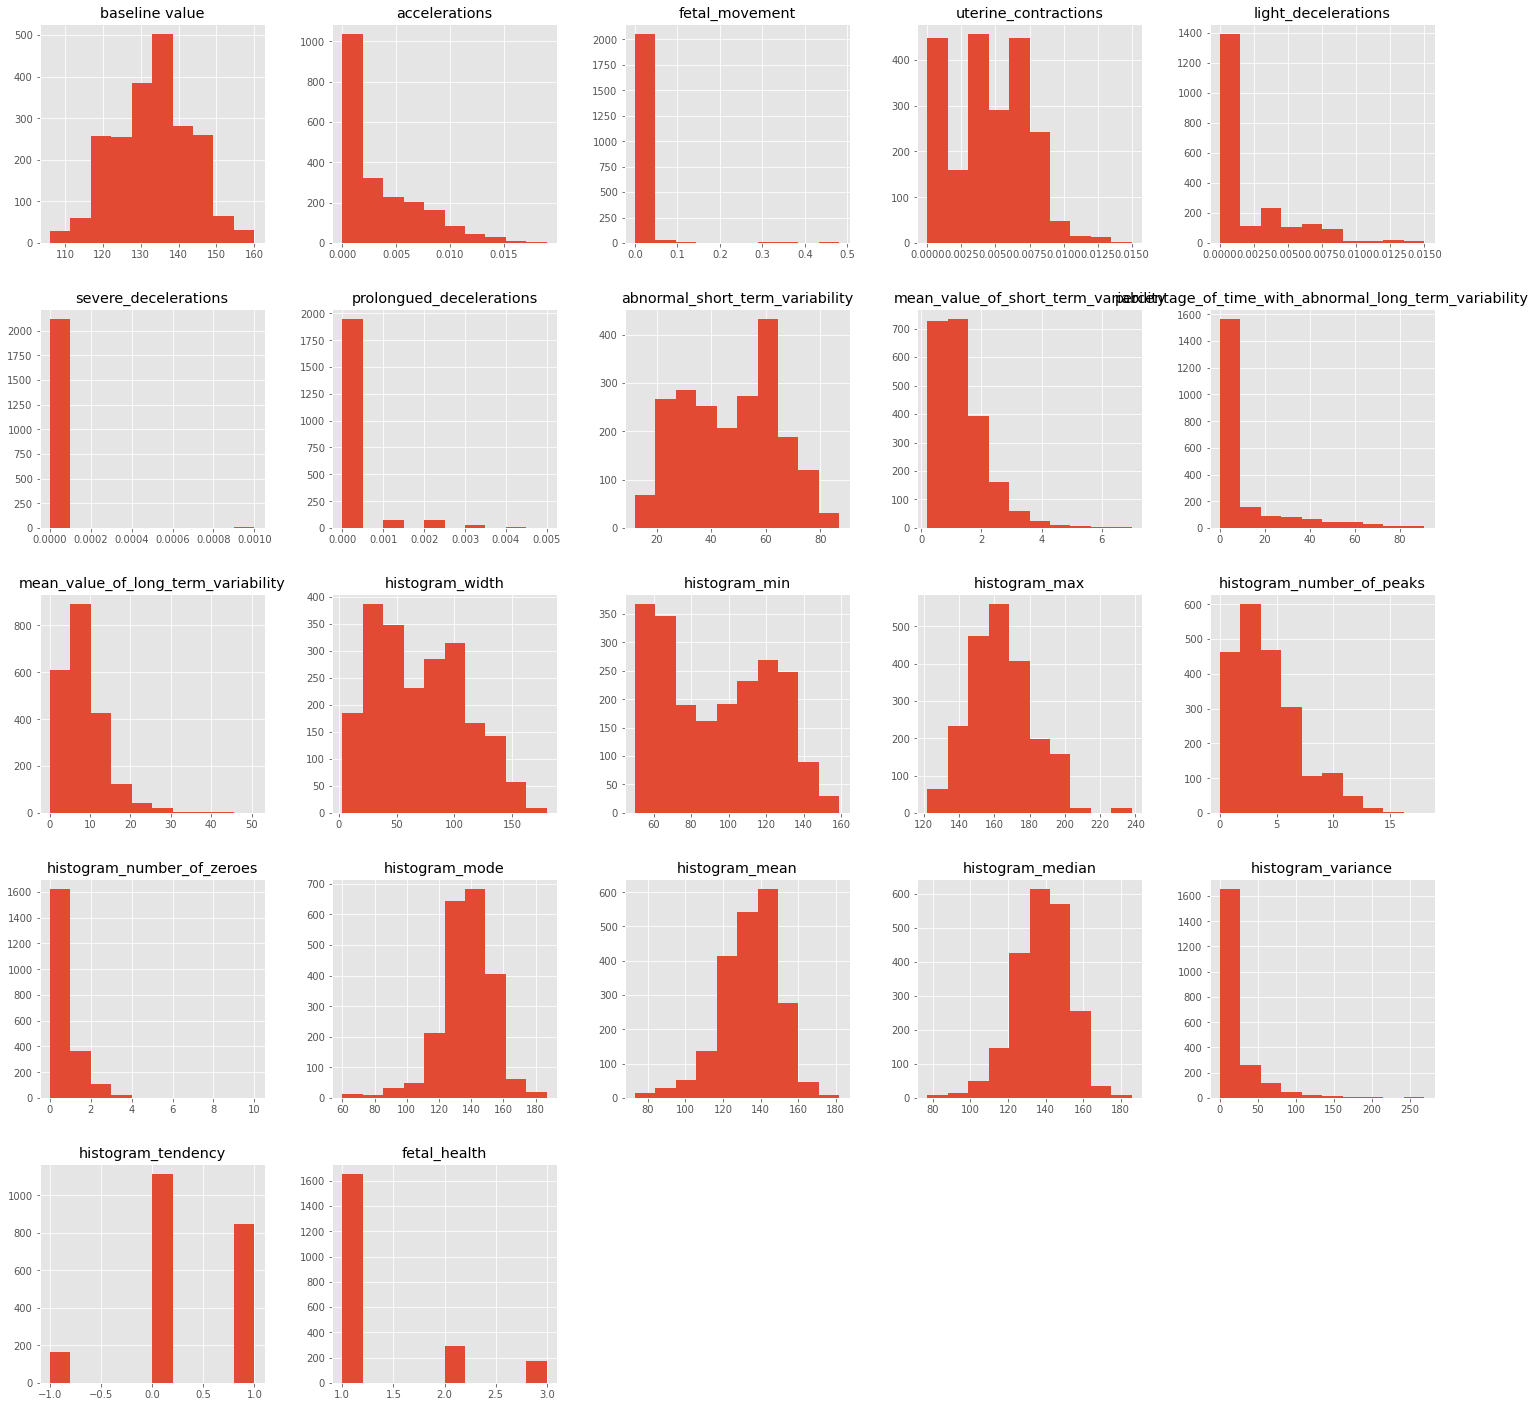

In [88]:
#Plot histograms of all features
hist_plot = df.hist(figsize = (25,25))
plt.show()

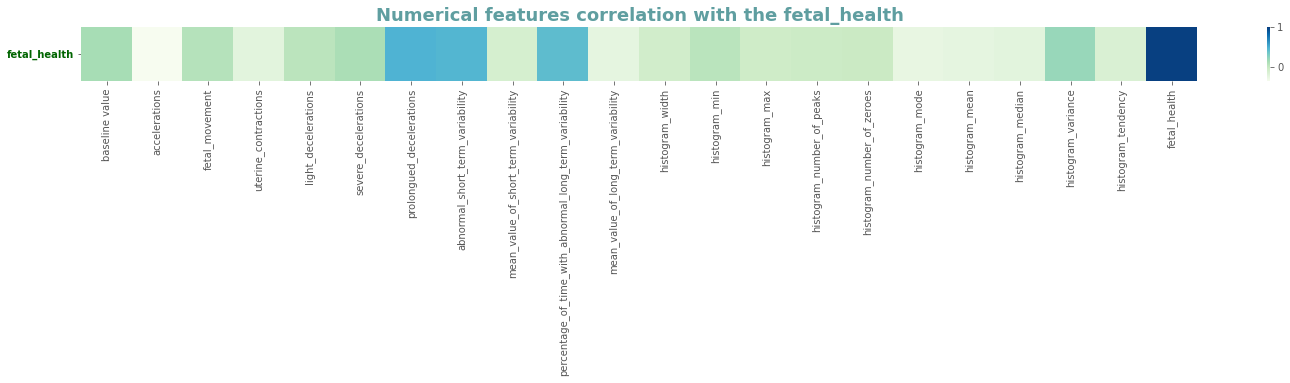

In [89]:
numerical_data = df.select_dtypes(exclude="object")
numeric_corr = numerical_data.corr()
f,ax=plt.subplots(figsize=(25,1))
sn.heatmap(numeric_corr.sort_values(by=["fetal_health"], ascending=False).head(1), cmap="GnBu")
plt.title("Numerical features correlation with the fetal_health", weight="bold", fontsize=18, color="#5F9EA0")
plt.yticks(weight="bold", color="darkgreen", rotation=0)

plt.show()

###Imbalanced data 




In [90]:
#Check data balancing
df['fetal_health'].value_counts()


1.0    1653
2.0     295
3.0     176
Name: fetal_health, dtype: int64

## Outliers detection

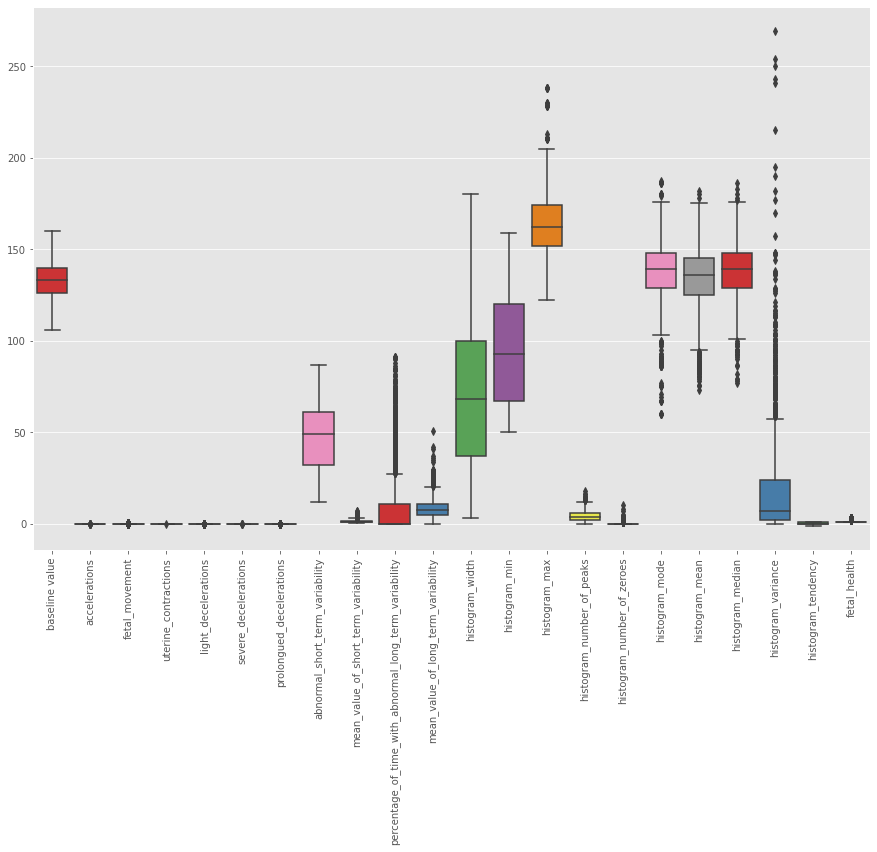

In [91]:
plt.figure(figsize=(15,10))
sn.boxplot(data = df,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

In [92]:
#Function to remove outliers
def outlier(attribute, df):

    lowerLimit = attribute.mean() - 3 * attribute.std()
    upperLimit = attribute.mean() + 3 * attribute.std()


    df1 = df[(attribute > lowerLimit) & (attribute < upperLimit)]
    df = df1.copy()

    return df

df = outlier(df.histogram_variance, df)
df = outlier(df.histogram_median, df)
df = outlier(df.histogram_mean, df)
df = outlier(df.histogram_mode, df)
df = outlier(df.percentage_of_time_with_abnormal_long_term_variability, df)
df = outlier(df.mean_value_of_short_term_variability, df)

In [93]:
df.shape

(1942, 22)

## Feature Scaling 

In [94]:
cols=df.drop(["fetal_health"],axis = 1).columns


In [95]:
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
X =  pd.DataFrame(scale_X.fit_transform(df.drop(["fetal_health"],axis = 1),), columns = cols)

In [96]:
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.373864,-0.854700,-0.191466,-1.519473,-0.622124,-0.032108,-0.222158,1.595050,-1.059838,2.264537,...,-0.129598,-1.134484,-2.220705,-0.684628,-0.441335,-1.445201,0.064744,-1.426012,2.881636,1.093741
1,-0.150458,0.691243,-0.191466,0.549340,0.483917,-0.032108,-0.222158,-1.744023,1.191874,-0.561135,...,1.669091,-0.926002,2.053849,0.714160,0.996707,0.140310,-0.009566,0.050956,-0.161153,-0.598725
2,-0.048508,-0.081729,-0.191466,1.238944,0.483917,-0.032108,-0.222158,-1.803650,1.191874,-0.561135,...,1.669091,-0.926002,2.053849,0.364463,0.996707,0.140310,-0.083876,-0.104514,-0.111271,-0.598725
3,0.053443,-0.081729,-0.191466,1.238944,0.483917,-0.032108,-0.222158,-1.803650,1.614069,-0.561135,...,1.314804,-1.447207,0.391522,2.462645,-0.441335,-0.161692,-0.158186,-0.182249,-0.111271,1.093741
4,-0.150458,0.948900,-0.191466,1.238944,-0.622124,-0.032108,-0.222158,-1.803650,1.614069,-0.561135,...,1.314804,-1.447207,0.391522,1.763251,-0.441335,-0.161692,-0.009566,-0.104514,-0.211034,1.093741


In [97]:
y = df['fetal_health']

## handle imbalanced dataset

In [98]:
#Apply oversampling technique to handle imbalanced dataset

from imblearn.over_sampling import RandomOverSampler as ROS
ros = ROS(random_state=42)
X_res, y_res = ros.fit_resample(X,y)



In [99]:
from collections import Counter

counter = Counter(y_res)
for k, v in counter.items():
    dist = v / len(y_res) * 100
    print(f"Class={k}, n={v} ({dist}%)")

Class=2.0, n=1599 (33.33333333333333%)
Class=1.0, n=1599 (33.33333333333333%)
Class=3.0, n=1599 (33.33333333333333%)


## Split the dataset 

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 30)


## SVM

In [101]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

Accuracy is:  0.9506944444444444 


classification_report: 


              precision    recall  f1-score   support

         1.0       0.99      0.90      0.94       484
         2.0       0.91      0.96      0.93       479
         3.0       0.96      1.00      0.98       477

    accuracy                           0.95      1440
   macro avg       0.95      0.95      0.95      1440
weighted avg       0.95      0.95      0.95      1440
 


Confusion Matrix: 



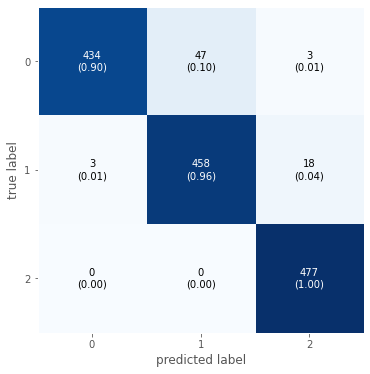

Accuracy: 0.95 (+/- 0.05)


In [102]:
# svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, y_train)

# Predict y data with classifier: 
y_predict_svc = svm.predict(X_test)

# Print results: 
print('Accuracy is: ', accuracy_score(y_test,y_predict_svc),'\n\n')
print('classification_report: \n\n')
print(classification_report(y_test, y_predict_svc), '\n\n')
print('Confusion Matrix: \n')

plt.style.use("ggplot")
cm = confusion_matrix(y_test,y_predict_svc)
plot_confusion_matrix(conf_mat = cm,figsize=(8,6),show_normed=True)
plt.show()

# cross validation with accuracy and standard deviation printe
cross_val_scores_svm = cross_val_score(svm_cls, X_res,y_res , cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val_scores_svm.mean(), cross_val_scores_svm.std() * 2))


## XGBoost

Accuracy is:  0.9666666666666667 


classification_report: 


              precision    recall  f1-score   support

         1.0       0.98      0.92      0.95       484
         2.0       0.93      0.98      0.95       479
         3.0       0.99      1.00      0.99       477

    accuracy                           0.97      1440
   macro avg       0.97      0.97      0.97      1440
weighted avg       0.97      0.97      0.97      1440
 


Confusion Matrix: 



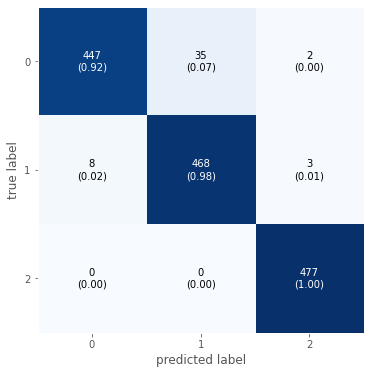

Accuracy: 0.95 (+/- 0.11)


In [103]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb = xgb_clf.fit(X_train, y_train)

# Predict y data with classifier: 
y_predict_xgb = xgb.predict(X_test)

# Print results: 
print('Accuracy is: ', accuracy_score(y_test,y_predict_xgb),'\n\n')
print('classification_report: \n\n')
print(classification_report(y_test, y_predict_xgb), '\n\n')
print('Confusion Matrix: \n')

plt.style.use("ggplot")
cm = confusion_matrix(y_test,y_predict_xgb)
plot_confusion_matrix(conf_mat = cm,figsize=(8,6),show_normed=True)
plt.show()

# cross validation with accuracy and standard deviation printe
cross_val_scores_xgb_clf = cross_val_score(xgb_clf, X_res, y_res, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val_scores_xgb_clf.mean(), cross_val_scores_xgb_clf.std() * 2))


## Random Forest


Accuracy is:  0.9861111111111112 


classification_report: 


              precision    recall  f1-score   support

         1.0       1.00      0.96      0.98       484
         2.0       0.96      1.00      0.98       479
         3.0       1.00      1.00      1.00       477

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440
 


Confusion Matrix: 



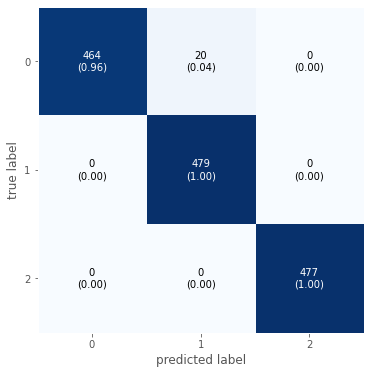

Accuracy: 0.96 (+/- 0.06)


In [104]:
#Applying RandomForest
from sklearn.ensemble import RandomForestClassifier

#Create Random Forest object
random_forest_cls = RandomForestClassifier()

#Train model
random_forest = random_forest_cls.fit(X_train, y_train)

# Predict y data with classifier: 
y_predict_rf = random_forest.predict(X_test)

# Print results: 
print('Accuracy is: ', accuracy_score(y_test,y_predict_rf),'\n\n')
print('classification_report: \n\n')
print(classification_report(y_test, y_predict_rf), '\n\n')
print('Confusion Matrix: \n')

plt.style.use("ggplot")
cm = confusion_matrix(y_test,y_predict_rf)
plot_confusion_matrix(conf_mat = cm,figsize=(8,6),show_normed=True)
plt.show()

# cross validation with accuracy and standard deviation printe
cross_val_scores_random_forest = cross_val_score(random_forest_cls, X_res, y_res, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val_scores_random_forest.mean(), cross_val_scores_random_forest.std() * 2))



## LBGM Classifier

Accuracy is:  0.9888888888888889 


classification_report: 


              precision    recall  f1-score   support

         1.0       1.00      0.97      0.98       484
         2.0       0.97      1.00      0.98       479
         3.0       1.00      1.00      1.00       477

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440
 


Confusion Matrix: 



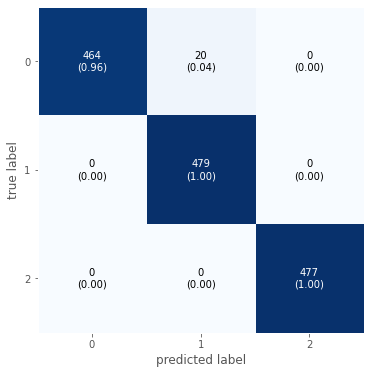

Accuracy: 0.96 (+/- 0.11)


In [105]:
#Applying LBGM
from lightgbm import LGBMClassifier

#Create LBGM object
lgb_cls = LGBMClassifier()

#Train model
lgb = lgb_cls.fit(X_train, y_train)

# Predict y data with classifier: 
pred_lgb = lgb.predict(X_test)

# Print results: 
print('Accuracy is: ', accuracy_score(y_test,pred_lgb),'\n\n')
print('classification_report: \n\n')
print(classification_report(y_test, pred_lgb), '\n\n')
print('Confusion Matrix: \n')

plt.style.use("ggplot")
cm = confusion_matrix(y_test,y_predict_rf)
plot_confusion_matrix(conf_mat = cm,figsize=(8,6),show_normed=True)
plt.show()

# cross validation with accuracy and standard deviation printe
cross_val_scores_lgb = cross_val_score(lgb_cls, X_res, y_res, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val_scores_lgb.mean(), cross_val_scores_lgb.std() * 2))
# cv_dict = cross_validate(lgb, X, y, return_train_score=True)